# Ford GoBike Data Visualiztaion 
## by Bassant Hany


## Investigation Overview

> Discover intersting patterns 

## Dataset Overview

> > This data set includes information about individual rides made
in a bike-sharing system covering the greater San Francisco
Bay area for the month February, 2019

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
bike_data_clean = pd.read_csv('bikesdata.csv')
bike_data_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 174880 entries, 0 to 174879
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   duration_sec        174880 non-null  int64  
 1   start_time          174880 non-null  object 
 2   end_time            174880 non-null  object 
 3   start_station_name  174880 non-null  object 
 4   end_station_name    174880 non-null  object 
 5   bike_id             174880 non-null  int64  
 6   user_type           174880 non-null  object 
 7   member_birth_year   174880 non-null  int64  
 8   member_gender       174880 non-null  object 
 9   day_of_week         174880 non-null  object 
 10  start_hour          174880 non-null  int64  
 11  end_hour            174880 non-null  int64  
 12  duration_minutes    174880 non-null  float64
 13  member_age          174880 non-null  int64  
dtypes: float64(1), int64(6), object(7)
memory usage: 18.7+ MB


## the percentage of user types

> the majority of users are subscribers making 90.5% of the total users

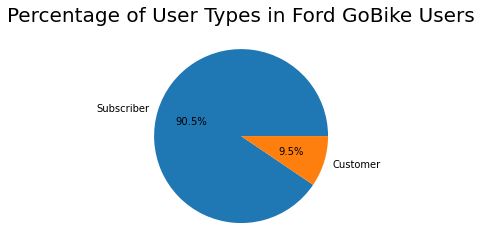

In [3]:
#sort the users types
sorted_user_types = bike_data_clean['user_type'].value_counts()
#create a pie chart and format it
plt.pie(sorted_user_types, labels = sorted_user_types.index, autopct='%1.1f%%', startangle=0, counterclock = True)
plt.title("Percentage of User Types in Ford GoBike Users", fontsize=20, y=1.0);

## the distribution of rides start_hour over the 24hrs of the days 

> The most popular hours were 8:00 AM and 5:00 PM, which are one hour before work starts and the hour work ends, we can conclude that people tend to rent bikes right before going to work or right after finishing work 

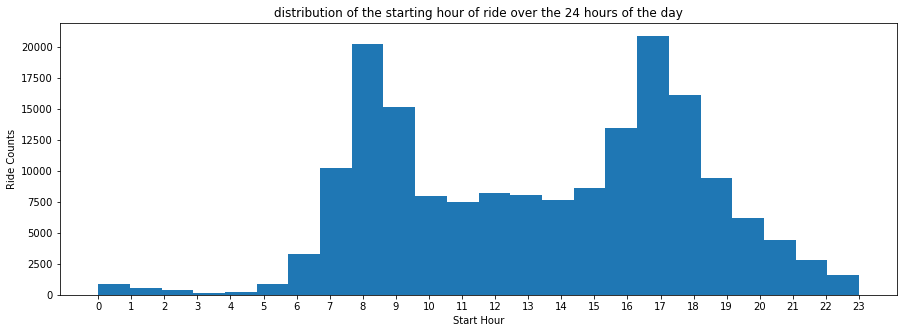

In [4]:
# plot a histogram 
plt.figure(figsize=[15,5])
#chose 24 bins for 24 hours of the day
plt.hist(data = bike_data_clean, x = 'start_hour', bins = 24)
#start the ticks from zero to 24 incrementing by 1
plt.xticks(np.arange(0, 24, 1))
plt.title('distribution of the starting hour of ride over the 24 hours of the day')
#create labels for x and y axis
plt.ylabel('Ride Counts')
plt.xlabel('Start Hour');

## the weekly usage of both subscribers and customers
>  Monday is the highest in usage for both customers and subscribers. Also customers have nearly constant usage through the week meanwhile subscribers have lower usage in Friday and Saturday



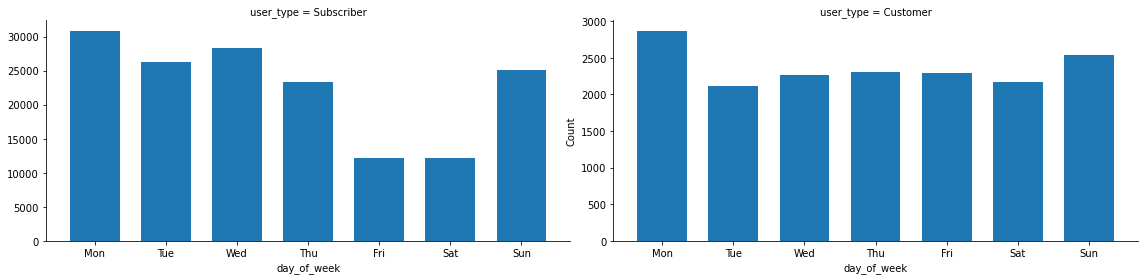

In [5]:
weekday_labels = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sorted_types = bike_data_clean['user_type'].value_counts().index
#creating histograms of start_weekday against user_type
bin_edges = np.arange(-0.5, 6.5+1, 1)
g = sb.FacetGrid(data = bike_data_clean, col = 'user_type', height=4, aspect=2, 
                 col_order = sorted_types, sharey=False)
g.map(plt.hist, 'day_of_week', bins = bin_edges, rwidth = 0.7);
plt.ylabel('Count')
plt.xticks(np.arange(0, 6+1, 1), weekday_labels);

## The correlation between User age and trip duration
> we can see that most users have the same trip duration which is about 120 - 200 mins, also we can notice that almost all of the higher values comes from people under the age of 60 which makes sense given that elderly people have lower stamina even if they're athelitic 

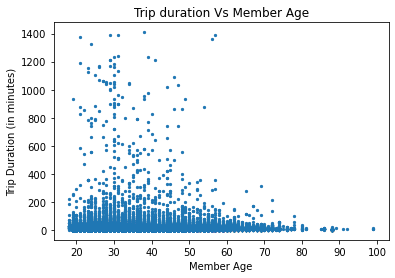

In [6]:
#create a scatter plot and format it
plt.scatter (bike_data_clean.member_age, bike_data_clean.duration_minutes, s=5);
#create a title 
plt.title('Trip duration Vs Member Age')
#create a label for x axis 
plt.xlabel('Member Age')
#create a label for y axis
plt.ylabel('Trip Duration (in minutes)');

## the most common hours to end your trip for both customers and subscribers
> from here we can deduce that customers tend to use bikes during the weekend mean while subscribes don't. Also the end_hour most common values being the same as start_hour tells that most of the trips don't last for more than an hour

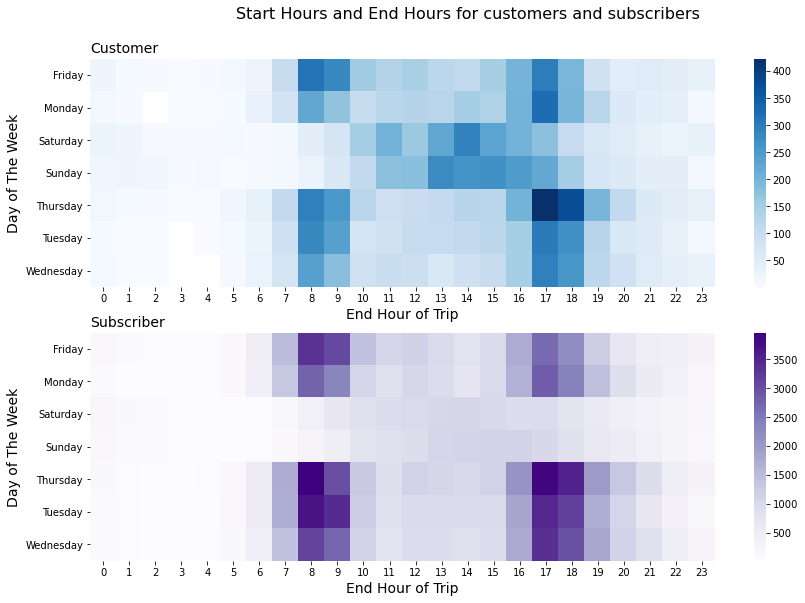

In [7]:
plt.figure(figsize=(14,9))
#create heatmap and format it
plt.subplot(2, 1, 1)
customers = bike_data_clean.query('user_type == "Customer"')
ct_counts = customers.groupby(['day_of_week', 'end_hour']).size()
ct_counts = ct_counts.reset_index(name='count')
ct_counts = ct_counts.pivot(index='day_of_week', columns='end_hour', values='count')
sb.heatmap(ct_counts, cmap="Blues");
plt.title('Customer', loc='left', fontsize=14);
plt.xlabel('End Hour of Trip', fontsize=14);
plt.ylabel('Day of The Week', fontsize=14);

plt.subplot(2, 1, 2)
subscribers = bike_data_clean.query('user_type == "Subscriber"')
st_counts = subscribers.groupby(['day_of_week', 'end_hour']).size()
st_counts = st_counts.reset_index(name='count')
st_counts = st_counts.pivot(index='day_of_week', columns='end_hour', values='count')
sb.heatmap(st_counts, cmap="Purples");
plt.title('Subscriber', loc='left', fontsize=14);
plt.xlabel('End Hour of Trip', fontsize=14);
plt.ylabel('Day of The Week', fontsize=14);

plt.subplots_adjust(top=0.9)
plt.suptitle('Start Hours and End Hours for customers and subscribers', fontsize=16);

In [9]:
!jupyter nbconvert slide_deck.ipynb --to slides --no-input

[NbConvertApp] Converting notebook slide_deck.ipynb to slides
[NbConvertApp] Writing 706108 bytes to slide_deck.slides.html
